In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)
def flip_n_times(N, b=0.5, verbose=True):
    #choose heads or tails N times.
    results = np.random.choice(['H','T'], size=N, p=[b,1-b])
    total_heads  = np.sum(results=='H')
    
    #print results
    if verbose:
        print("Number of Heads/Total Throws:", total_heads/N)
    
    return results

In [2]:
total_flips=10000
n_replications=10

def plot_history(total_flips,n_replications,normed=True):

    for rep in range(n_replications):
        random_flips = flip_n_times(total_flips, .217, verbose=False)

        #cumsum is a nice numpy function for "the total so far"
        running_sum = np.cumsum(random_flips=="H")

        #holds the denominator at each index
        sequence_lengths = np.array(range(1,total_flips+1))
        
        if normed:
            #divide to get the overall mean
            running_means = running_sum / sequence_lengths
        else:
            #just misnomer the totals
            running_means = running_sum
        #running_means = running_sum / sequence_lengths
        plt.plot(sequence_lengths, running_means)
    plt.xlabel("Number of flips")
    if normed:
        plt.ylabel("Average Number of Heads")
    else:
        plt.ylabel("Total Number of Heads")
    plt.show()

## CLT Applied to Simulation
As with the LLN, the CLT behaves particularly well when we restrict to a sum/mean of a bunch of independent draws from a given distribution.

### CLT Restated
If we restrict the CLT to looking at the running sum of a series of independent draws from THE SAME distribution with mean $\mu$ and variance $\sigma^2$, it can be stated very simply: 

"The average you calculate from your sample is the same as a draw from Normal($\mu$,$\frac{\sigma^2}{n})$; $\mu$ and $\sigma^2$ are the mean and varaince of the distribution you're drawing from."

Looking at it another way, if you and a bunch of friends all calculate means off of different samples and plot each person's result, the results will follow a the normal distribution quoted above. Your calcuclated mean may happen be dead center or in the tail, however.

#### Other Sums/Means 
The just like the LLN can be applied to, e.g., sample varainces becuase they fit the format of an expectation, the CLT can be applied to any sum or average. However, we must be careful about which distribution's $\mu$ and $\sigma$ we use.

For instance the sample variance for a distribution/random variable $X$ can be found via the mean of $(X-\mu)^2$ (assuming we know $\mu$ and don't have to guess it). Fitting this into the CLT, we see that with lots of data such a sample variance is a draw from Normal$(\mu_v$,$\frac{\sigma^2_v}{n})$ where $\mu_v$ and $\sigma^2_v$ are the mean and the varaince of the distribution of $(X-\mu)^2$, whatever it may look like. Importantly, $(X-\mu)^2$ may have a very different variance than the distribution of $X$ itself.

#### In terms of Standard Deviation
Instead of the phrasing as with variance above, it can be more natural to think in terms of standard deviations. We can work out that the sample sum has standard deviation $\sigma\sqrt{n}$, and the sample mean has standard deviation $\frac{\sigma}{\sqrt{n}}$.


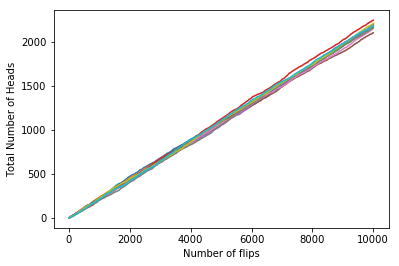

In [3]:
plot_history(total_flips,n_replications,normed=False)

Above, we can see that the number of heads observed / the sample sum spreads out over time, with the spread scaling as ${\sqrt{n}}$ as sample size grows.

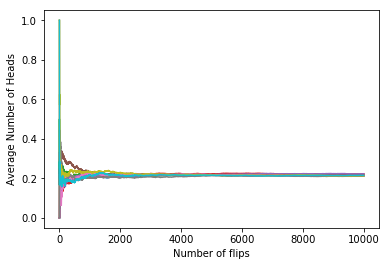

In [4]:
plot_history(total_flips,n_replications,normed=True)

However, the mean observed in each sample converges over time. **But becuase the convergence is only $\frac{1}{\sqrt{n}}$ we need to 4x the sample size get a 2x reduction jitter in noise.**

### Bounding/Estimating Error Rate
As mentioned in CLT in Practice, since we know lots of things about normal distributions we can chaaracterize how wrong our particular draw from the set of possible sample means is likely to be.

To estimate error probability, e.g. the chance that our mean is more than .01 away from the true mean we estimate the underlying distirbution's variance $\sigma^2$ (via whatever method) and find $$P(-0.1<Normal(0,\frac{\sigma^2}{n})<0.1$$

To actively control error probability we just solve for n in the above equation. If we want a lower than 10% chance of our mean being off by more than .02 and we've estimated the underlying variance to be 5 we want: $$P(-.02<Normal(0,\frac{25}{n})<.02)<.10$$ and find a value of n that makes the inequality hold.

### Finite n
The above calculations assumed that the CLT holds exactly at sample size n, i.e. that the distribution of possible sample means was truly was normal. This is usually only approximately true. If we want to be very sure, we have accurate bounds we could invoke specific inequalites that hold for finite sums, e.g. Hoefding's inequality.